# Effect of Sampling Frequency on Distribution of Bike Count in *status* Data 

As shown in [another report](https://github.com/MuhammadVT/bike_sharing/blob/master/data_exploration/explore_status_data.ipynb) 
, the *status* data is large (1.9 GB in size, about 72 million data points). Therefore, we need to downsample the data to reduce its size. In this report we investigate the effect of sampling frequency on the distribution of bike count, and choose a suitable sample frequency accordingly.  

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import sqlite3
from IPython.display import display

# load custom modules
from data_sampler import sampler
from sqlite_to_csv import sqlite_to_csv
from reading_tools import read_data_from_db

In [2]:
# show the figures within the notebook
%matplotlib inline

# Select ggplot as style
plt.style.use("ggplot")

## Downsamle the *status* data

The code in this section is to sample the original data at a given frequency. The sampled data will be written into an sqlite db. After that, it can also be moved to a .csv file if need. 

In [3]:
# run the folowing if downsampled data is needed. It only needs to be run once.
sample_data = False   # set this to True is sampled data is needed
db_to_csv = False     # set this to True if .csv format is desired

# set parameter values
time_res = 15
dbname = "../data/sampled_data.sqlite"
tbname = "time_res_" + str(time_res) + "min"

# downsample the data and then store the output in an sqlite3 db
if sample_data:
    output = sampler(time_res=time_res, n_jobs=None, save_to_db=True,
                     db_name=dbname, table_name=tbname, verbose=False)
    
# move data from sqlite3 db into a csv file, if needed
if db_to_csv:
    outfile = "../data/status_" + tbname + ".csv"
    print "Moving data from " + tbname + " table to a .csv file."
    sqlite_to_csv(dbname, tbname, outfile)
    print "status_time_res_" + str(time_res) + ".csv has been created."

## Display the sampled *status* data

The purpose of this section is to give the overview of the original data and the data that have been sampled at various sample frequencies.

### Original *status* data

In [4]:
# read the data
df_status = pd.read_csv("../data/status.csv", nrows=100)

# get the total number of data points from sqlite db file

# make db connection
conn = sqlite3.connect("../data/database.sqlite")
cur = conn.cursor()

# get the total number of data points in status table
command = "SELECT Count(station_id) FROM {tb}".format(tb="status")
cur.execute(command)
npnts_1min = cur.fetchone()[0]

# close db connection
conn.close()

# display the data
display(df_status.head(15))

print("\nThe number of data points in this table is " + str(npnts_1min)) + "."

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02



The number of data points in this table is 71984434.


### Sampled *status* data

In [5]:
time_res_list = ["1", "5", "10", "15"]

# make db connection
conn = sqlite3.connect("../data/sampled_data.sqlite")
cur = conn.cursor()

for tm in time_res_list:
    # read the data
    dfn = pd.read_csv("../data/status_time_res_" + tm + "min.csv", nrows=100, header=None, names=df_status.columns)

    print("\nstatus data sampled at every " + tm + " minutes:")
    
    # display the data
    display(dfn.head(5))
    
    # get the total number of data points in status table
    tb = "time_res_" + tm + "min"
    command = "SELECT Count(station_id) FROM {tb}".format(tb=tb)
    cur.execute(command)
    npnts = cur.fetchone()[0]
    ratio = round(100. * npnts / npnts_1min, 2)
    print("\nThe number of data points in this table is " + str(npnts) +\
           ", which is " + str(ratio) + "% of the original data.\n")
    
# close db connection
conn.close()


status data sampled at every 1 minutes:


,station_id,bikes_available,docks_available,time
0,2,2,25,2013-08-29 12:06:00
1,2,2,25,2013-08-29 12:07:00
2,2,2,25,2013-08-29 12:08:00
3,2,2,25,2013-08-29 12:09:00
4,2,2,25,2013-08-29 12:10:00



The number of data points in this table is 71984364, which is 100.0% of the original data.


status data sampled at every 5 minutes:


,station_id,bikes_available,docks_available,time
0,2,2,25,2013-08-29 12:10:00
1,2,2,25,2013-08-29 12:15:00
2,2,2,25,2013-08-29 12:20:00
3,2,2,25,2013-08-29 12:25:00
4,2,2,25,2013-08-29 12:30:00



The number of data points in this table is 14416413, which is 20.03% of the original data.


status data sampled at every 10 minutes:


,station_id,bikes_available,docks_available,time
0,2,2,25,2013-08-29 12:10:00
1,2,2,25,2013-08-29 12:20:00
2,2,2,25,2013-08-29 12:30:00
3,2,2,25,2013-08-29 12:40:00
4,2,2,25,2013-08-29 12:50:00



The number of data points in this table is 7206269, which is 10.01% of the original data.


status data sampled at every 15 minutes:


,station_id,bikes_available,docks_available,time
0,2,2,25,2013-08-29 12:15:00
1,2,2,25,2013-08-29 12:30:00
2,2,2,25,2013-08-29 12:45:00
3,2,2,25,2013-08-29 13:00:00
4,2,3,24,2013-08-29 13:15:00



The number of data points in this table is 4804511, which is 6.67% of the original data.



### Plot sampled data for specific days

The purpose of this section is to compare bike count vs time from each sampled dataset for three specific days.

In [6]:
def plot_time_series(dtm, station_id):
    """ plots various downsampled data for a specific day
    
    Parameters
    ----------
    dtm : datetime.datetime
        The date of interest
    station_id : int
        The station id
    
    """
    
    # initialze parameters
    stm = dt.datetime(dtm.year, dtm.month, dtm.day)
    etm = stm + dt.timedelta(days=1)
    time_res_list = ["1", "5", "10", "15"]
    clist = ["k", "b", "orange", "r"]
    label_list = [x+" min" for x in time_res_list] 
    
    # create a figure
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = np.reshape(axes, -1)

    for i, tm in enumerate(time_res_list):
        ax = axes[i]

        # read the data with time_res = 1min
        dfn = read_data_from_db(stm, etm, station_id, time_res="1")

        # plot the data
        ax.plot_date(dfn.time.as_matrix(), dfn.bikes_available.as_matrix(), color=clist[0],
                     ms=3, linestyle="-", label=label_list[0])

        if tm != "1":
            # read the data with time_res = tm
            dfn = read_data_from_db(stm, etm, station_id, time_res=tm)
            
            # plot the data
            ax.plot_date(dfn.time.as_matrix(), dfn.bikes_available.as_matrix(), color=clist[i],
                         ms=3, linestyle="-", label=label_list[i])
            axes[0].plot_date(dfn.time.as_matrix(), dfn.bikes_available.as_matrix(), color=clist[i],
                 ms=3, linestyle="-", label=label_list[i])

        # format the datetime format
        import matplotlib.dates as mdates
        fmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(fmt)

        # set x, y tick labels, and the legends
        ax.set_xlabel("Time", fontsize=20)
        ax.set_ylabel("Bike Count", fontsize=20)
        for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(15) 
            # tick.label.set_rotation(30)

    # add legends
    for ax in axes:
        ax.legend(fontsize=20)

    # set figure title
    fig_title = "station_id = " + str(station_id)
    fig_title = fig_title + "\n" + stm.strftime("%Y-%m-%d") + "  -  " + etm.strftime("%Y-%m-%d") +\
                " (" + dtm.strftime("%A") + ")"
    fig.suptitle(fig_title, fontsize=25, y=0.97)
    plt.show()
    

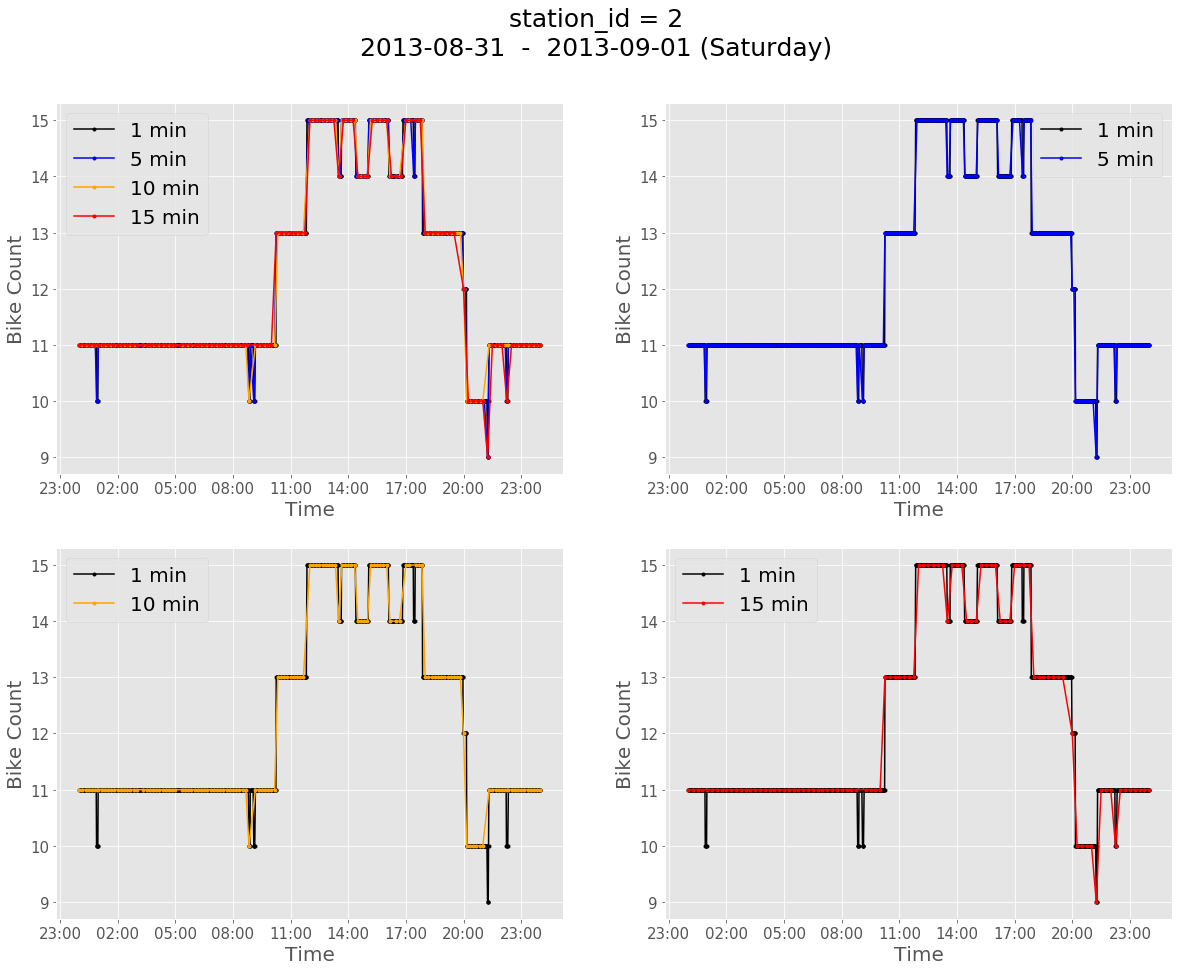

In [7]:
# choose the date you want to see the data for
dtm = dt.datetime(2013, 8, 31)
station_id = 2
plot_time_series(dtm, station_id)

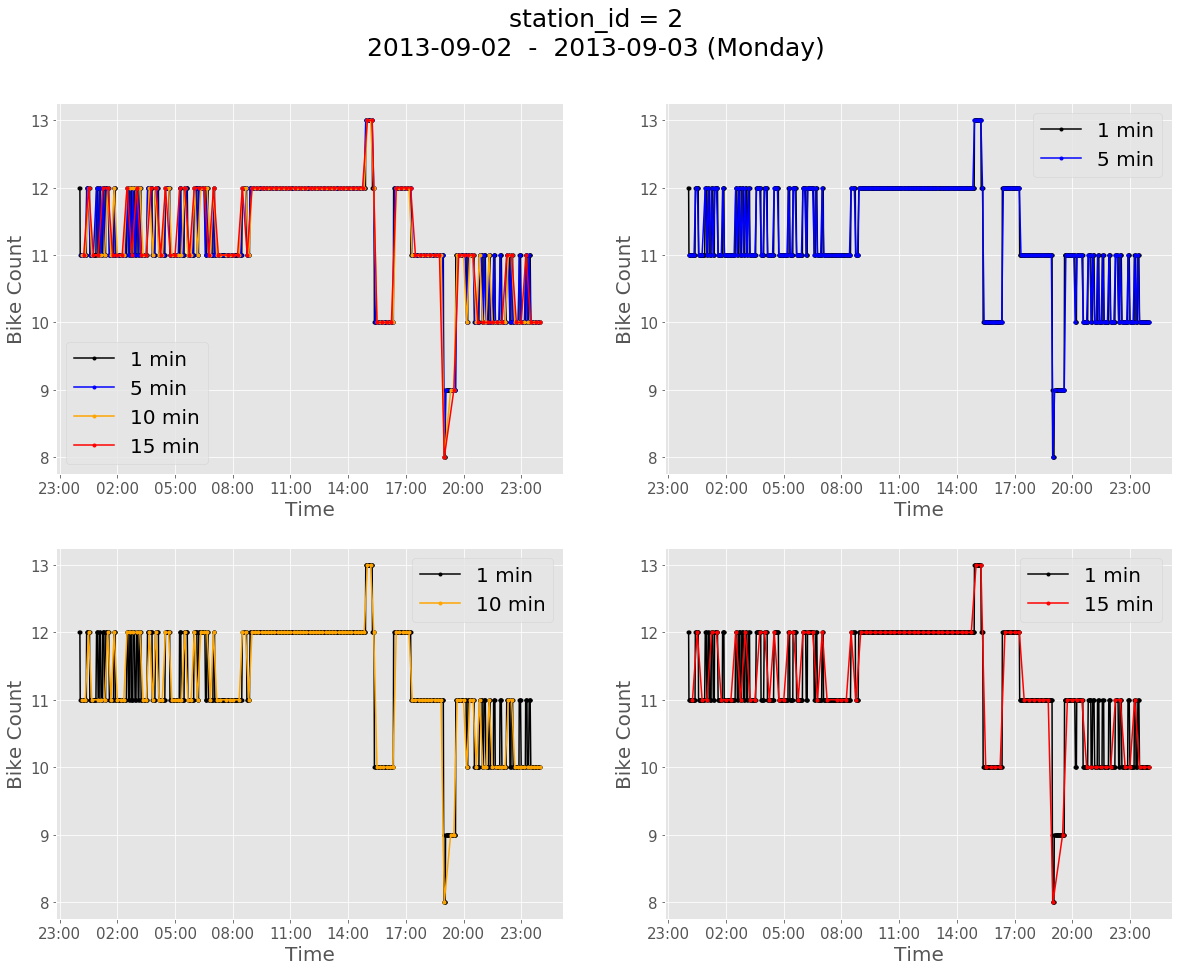

In [8]:
# choose the date you want to see the data for
dtm = dt.datetime(2013, 9, 2)
station_id = 2
plot_time_series(dtm, station_id)

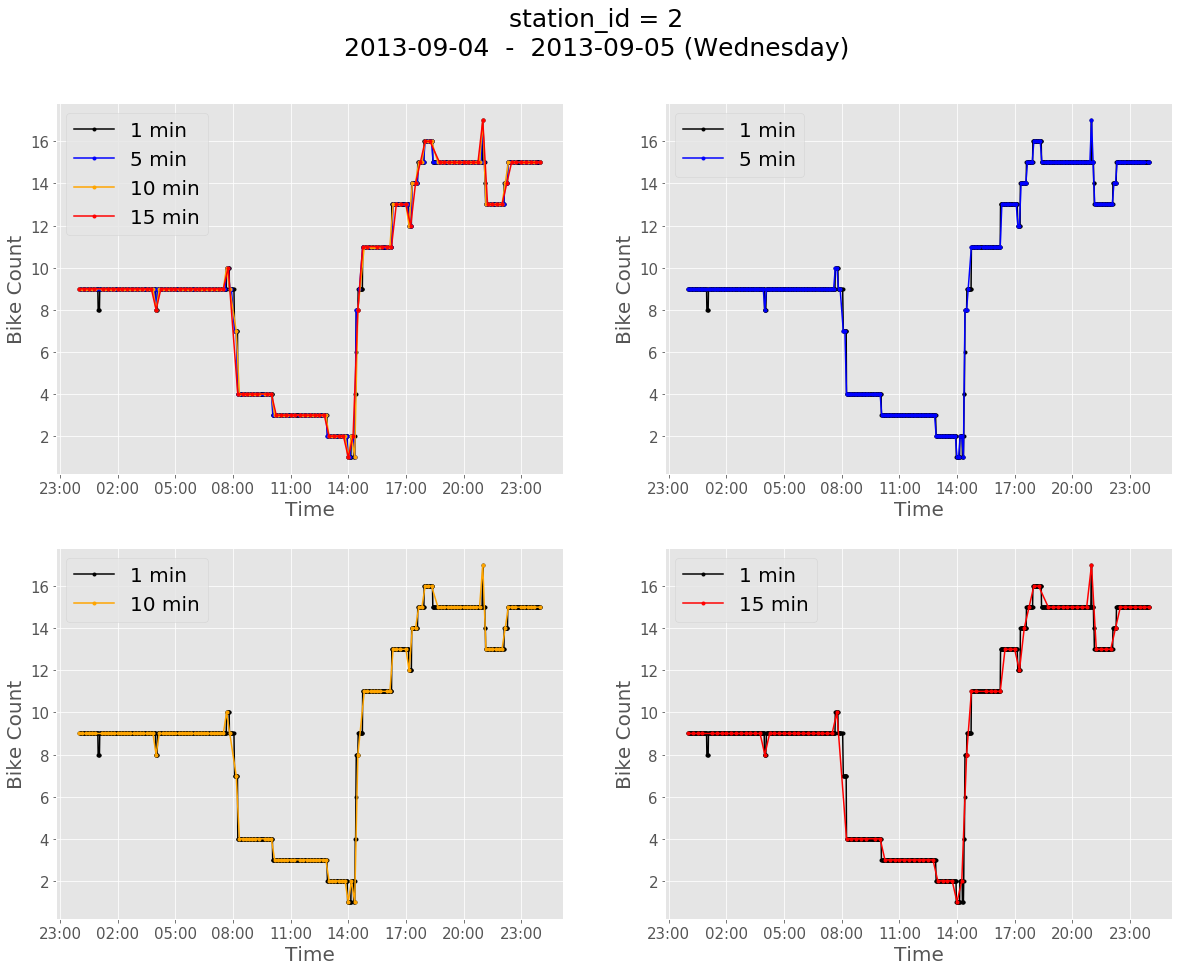

In [9]:
# choose the date you want to see the data for
dtm = dt.datetime(2013, 9, 4)
station_id = 2
plot_time_series(dtm, station_id)

**Conclusion**: For randomly chosen three days above, the sampled data with 5-min resolution is very similar to the original data with 1-min resolution. 15-min resolution data is still good for most of the time except for periods when the bike count fluctates rapidly.   

## Compare the histograms of bike count in sampled datasets

### Plot the histograms separately

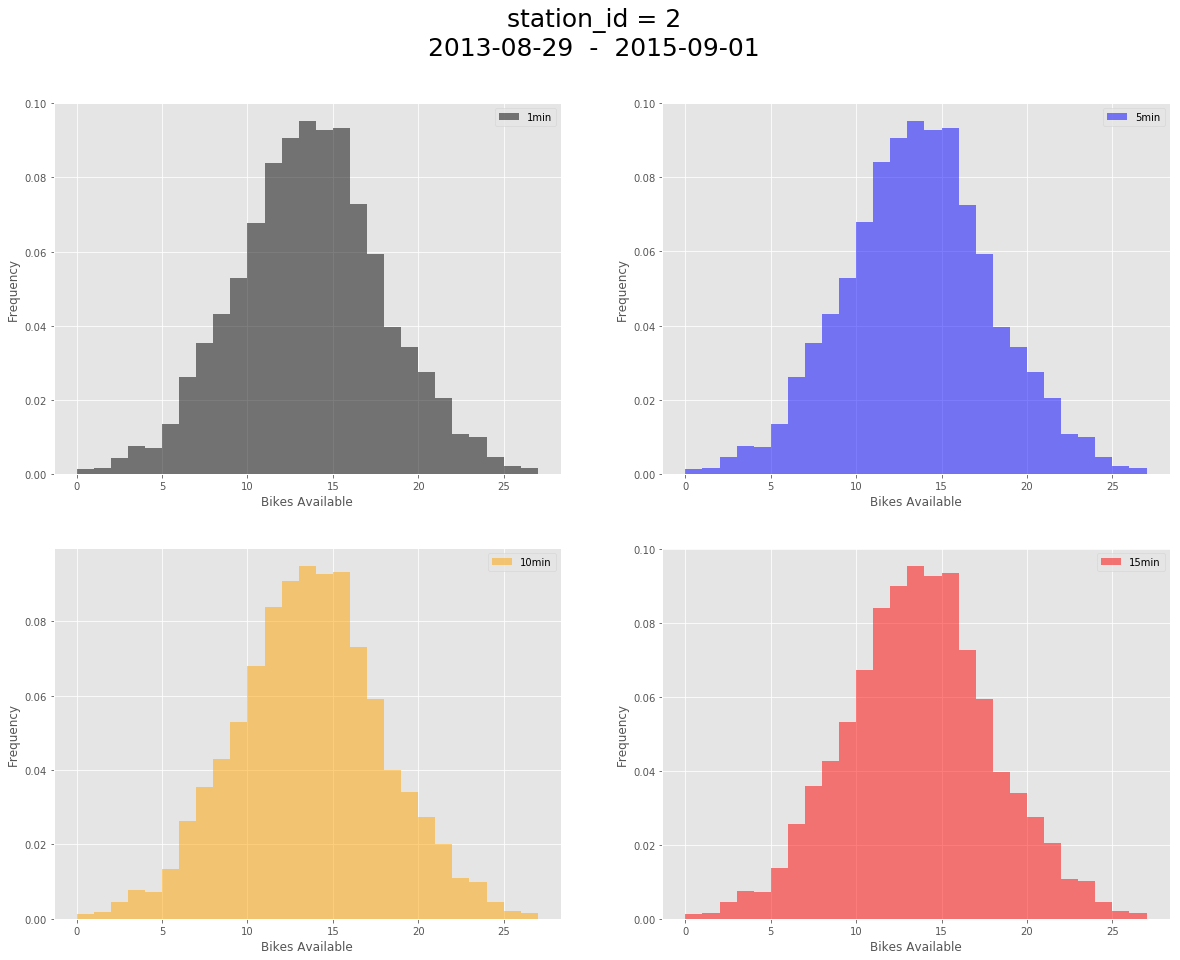

In [10]:
# initialze parameters
stm = dt.datetime(2013, 8, 29)
etm = dt.datetime(2015, 9, 1)
station_id = 2
time_res_list = ["1", "5", "10", "15"]
clist = ["k", "b", "orange", "r"]
label_list = [x+" min" for x in time_res_list] 
    
# create a figure
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = np.reshape(axes, -1)

# plot the histograms of bikes_available
for i, tm in enumerate(time_res_list):
    ax = axes[i]

    # read the data with time_res = 1min
    dfn = read_data_from_db(stm, etm, station_id, time_res=tm)
    dfn.bikes_available.plot.hist(ax=ax, bins=27, label=tm + "min", color=clist[i],
                                  alpha=0.5, histtype="stepfilled", normed=True)
    ax.set_xlabel("Bikes Available")
    ax.legend()
 
# set figure title
fig_title = "station_id = " + str(station_id)
fig_title = fig_title + "\n" + stm.strftime("%Y-%m-%d") + "  -  " + etm.strftime("%Y-%m-%d")
fig.suptitle(fig_title, fontsize=25, y=0.97)
plt.show()

### Plot the histograms for different stations

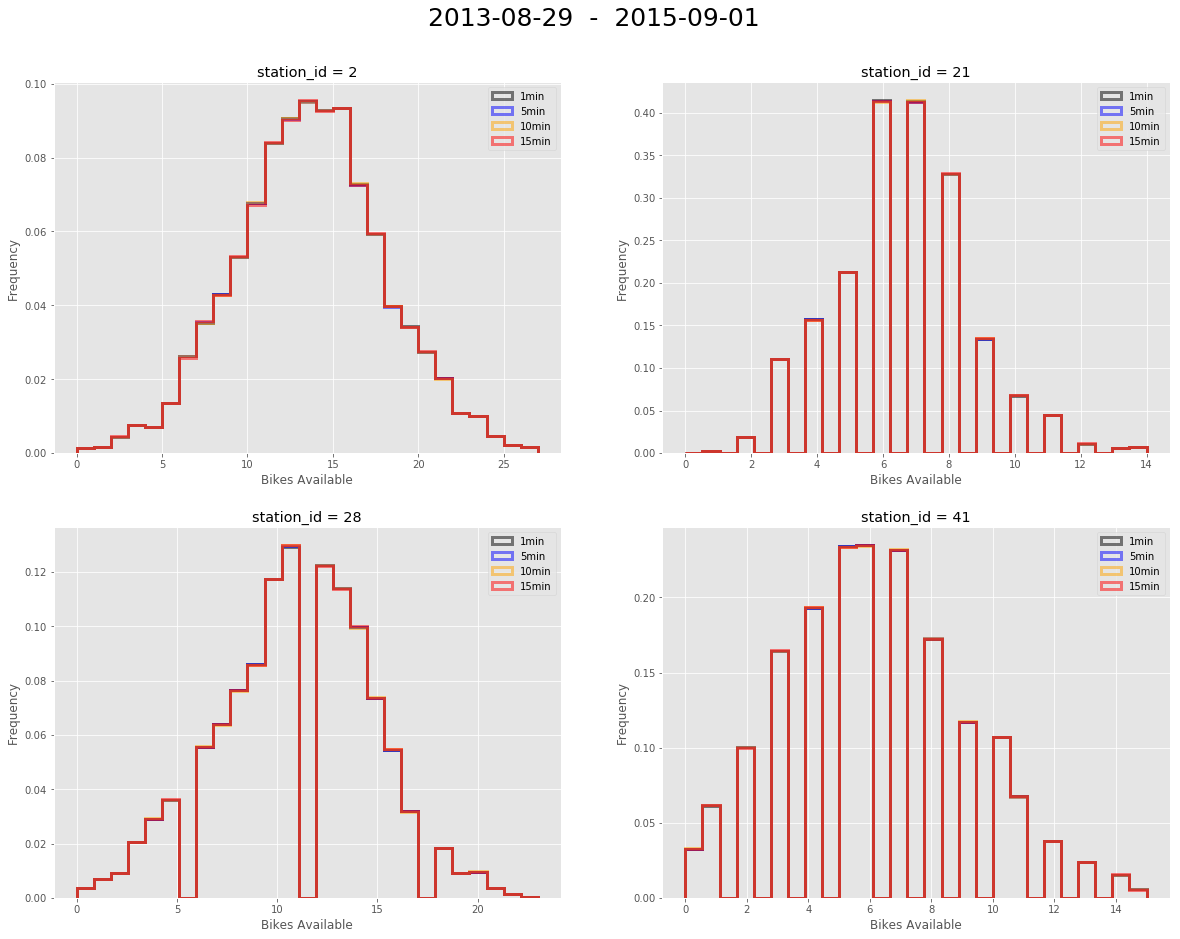

In [14]:
stations = [2, 21, 28, 41]

# create a figure
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = np.reshape(axes, -1)

for j, ax in enumerate(axes):
    station_id = stations[j]
    # plot the histograms of bikes_available
    for i, tm in enumerate(time_res_list):

        # read the data with time_res = 1min
        dfn = read_data_from_db(stm, etm, station_id, time_res=tm)
        dfn.bikes_available.plot.hist(ax=ax, bins=27, label=tm + "min", color=clist[i],
                                      alpha=0.5, histtype="step", normed=True, lw=3)
        ax.legend()

    ax.set_xlabel("Bikes Available")
    ax.set_title("station_id = " + str(station_id))

# set figure title
fig_title = stm.strftime("%Y-%m-%d") + "  -  " + etm.strftime("%Y-%m-%d")
fig.suptitle(fig_title, fontsize=25, y=0.95)
plt.show()

## Summary

We have examined the effects of different sampling frequencies, namely 1-min, 5-min, 10-min and 15-min, on the bike count distribution. Based on the above histograms for four stations we can qualitatively conlude that the 15-min resolution data can still represent the bike count distribution in original dataset. Therefore, we can safely use 15-min resolution data for future studies.